# Package Calling

In [1]:
import sys

sys.path.append("../../")

In [2]:
import datetime as dtt
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Package Settings

In [3]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [4]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("chained_assignment", None)

In [5]:
plt.rcParams["font.family"] = ["Arial Unicode MS"]  # Chinese Labels
plt.rcParams["axes.unicode_minus"] = False  # Minus Sign
plt.rcParams["figure.max_open_warning"] = 0

sns.set(
    style="darkgrid",
    rc={
        "figure.figsize": (12, 6),
        "font.sans-serif": ["Arial Unicode MS", "Arial"],
    },
)

## GC Settings

In [6]:
import gc

gc.isenabled()
gc.get_threshold()

True

(700, 10, 10)

In [7]:
# gc.set_threshold(10,1,1)
# gc.enable()
# gc.disable()

# Modeling

In [8]:
data_path = "/Users/chenzhou/Documents/Everything/python/COVID19/data/data_0516_SH.csv"
data_sh = pd.read_csv(
    data_path,
    dtype={
        "inbound_confirmed": int,
        "inbound_asymp": int,
        "outbound_confirmed": int,
        "outbound_asymp": int,
        "cure": int,
        "relieve": int,
    },
    parse_dates=["date"],
)

In [9]:
data_sh["confirmed_add"] = data_sh.inbound_confirmed + data_sh.outbound_confirmed
data_sh["asymp_add"] = data_sh.inbound_asymp + data_sh.outbound_asymp
data_sh["total_add"] = data_sh.confirmed_add + data_sh.asymp_add

data_sh["confirmed_acc"] = data_sh.confirmed_add.cumsum() - 380
data_sh["asymp_acc"] = data_sh.asymp_add.cumsum() - 120
data_sh["total_affected"] = data_sh.confirmed_acc + data_sh.asymp_acc

data_sh = data_sh.loc[data_sh.date >= "2022-03-01"].reset_index(drop=True)

In [10]:
data_sh

,inbound_confirmed,inbound_asymp,outbound_confirmed,outbound_asymp,date,cure,relieve,confirmed_add,asymp_add,total_add,confirmed_acc,asymp_acc,total_affected
0,1,1,37,17,2022-03-01,8,1,38,18,56,95,5,100
1,3,5,39,19,2022-03-02,8,2,42,24,66,137,29,166
2,2,14,43,21,2022-03-03,9,1,45,35,80,182,64,246
3,3,16,24,10,2022-03-04,12,0,27,26,53,209,90,299
4,0,28,25,10,2022-03-05,8,4,25,38,63,234,128,362
5,3,45,32,16,2022-03-06,65,16,35,61,96,269,189,458
6,4,51,36,10,2022-03-07,27,10,40,61,101,309,250,559
7,3,62,26,10,2022-03-08,32,7,29,72,101,338,322,660
8,4,76,42,16,2022-03-09,18,13,46,92,138,384,414,798
9,11,64,32,10,2022-03-10,17,7,43,74,117,427,488,915


## Optimize BS Pars Locally

In [11]:
from covid19 import bs_coeff_local_opt, model_theta_global_opt, revise_ser

In [12]:
bs_interp_prop = 0.5
interg_interp_prop = 500.0
ser = data_sh.total_affected.iloc[28:].values
kappa, mu, tau = 0.6, 1.0, 1.8

In [13]:
labd, lr, decay, iters, early_stop_ratio, early_stop_steps, show_process = (
    5.0,
    0.02,
    0.999,
    int(4e2),
    [1.1, 0.999],
    3,
    True,
)

(array([-0.00446955, -0.02432212, -0.03494476]),
 68058.29120741376,
 array([ 15376.31169674,  21397.46164228,  29452.87244041,  38484.56721497,
         48816.4146564 ,  61039.11971463,  75428.88681095,  92125.7471299 ,
        111039.53943756, 131982.09287213, 154603.39047879, 178505.95167099,
        203264.2874284 , 228455.482859  , 253694.92801782, 278628.26564876,
        302983.84430399, 326546.91527311, 349247.63498685, 371075.28348042,
        392110.73006575, 412466.8503139 , 432292.95555588, 451682.5675312 ,
        470469.61385363, 488395.12155845, 505088.10949306, 520210.83140963,
        533670.48886754, 545470.40741557, 555753.4607531 , 564694.50198214,
        572456.7536646 , 579201.4289486 , 585093.33386703, 590290.15717353,
        594917.52561976, 599079.21563602, 602823.66436898, 606175.28633889,
        609117.7448439 , 611638.92453552, 613784.34670082, 615617.39810663,
        617215.29080334, 618657.11470465, 620015.64589403, 621362.74765928,
        622772.9459

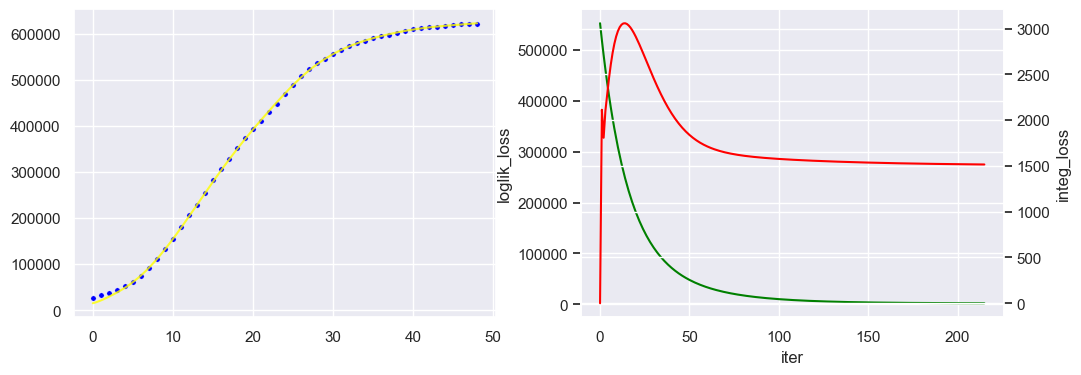

In [14]:
bs_coeff_local_opt(
    ser,
    kappa,
    mu,
    tau,
    bs_interp_prop,
    interg_interp_prop,
    labd,
    lr,
    decay,
    iters,
    early_stop_ratio,
    early_stop_steps,
    show_process,
    ser_loss_expansion=0.5,
)

## Optimize Theta Globally

In [15]:
kappa_init, mu_init, tau_init = 0.59, 1.0, 1.81

inter 0: Theta: [0.59060356 1.00278527 1.81354436] Loss: 63562.973801590124
inter 1: Theta: [0.59082545 1.00629384 1.81727524] Loss: 49748.02322857234
inter 2: Theta: [0.59082234 1.00956819 1.82130934] Loss: 61356.10147972504


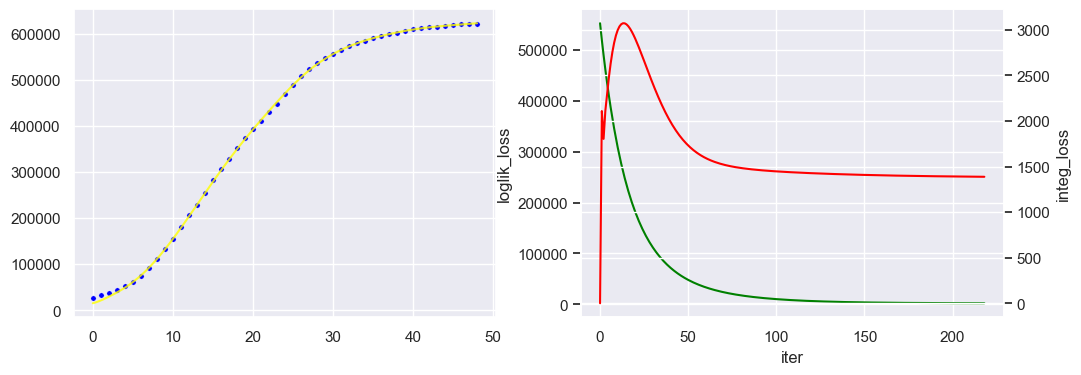

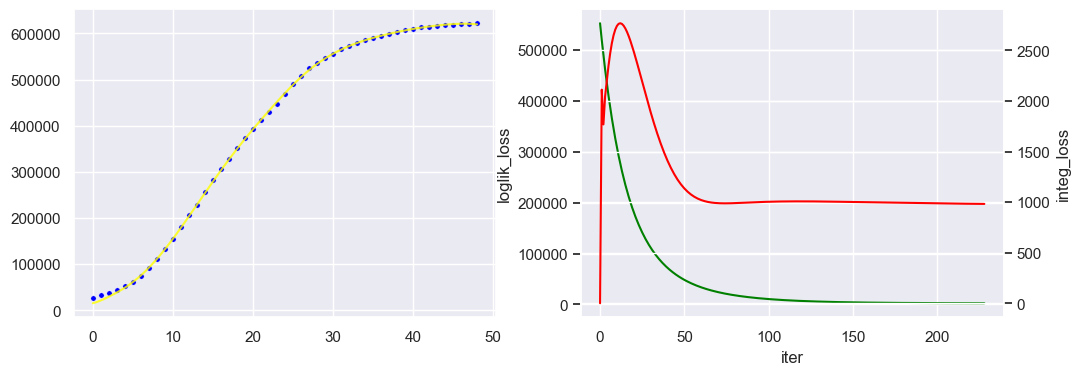

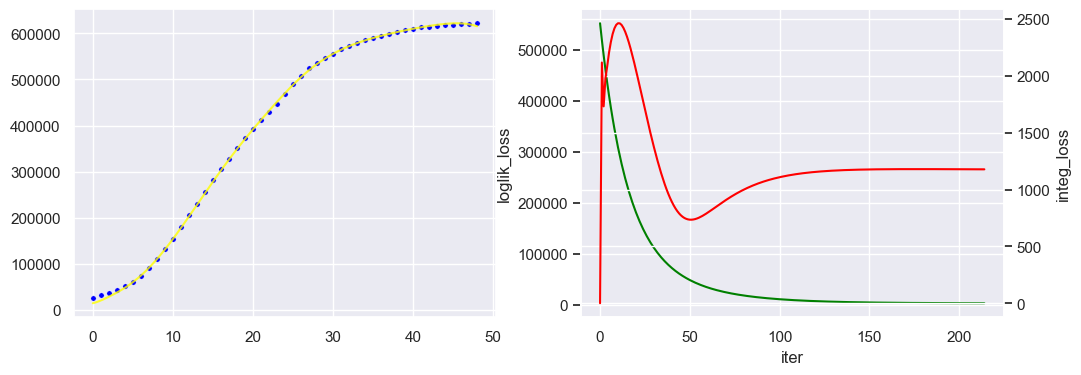

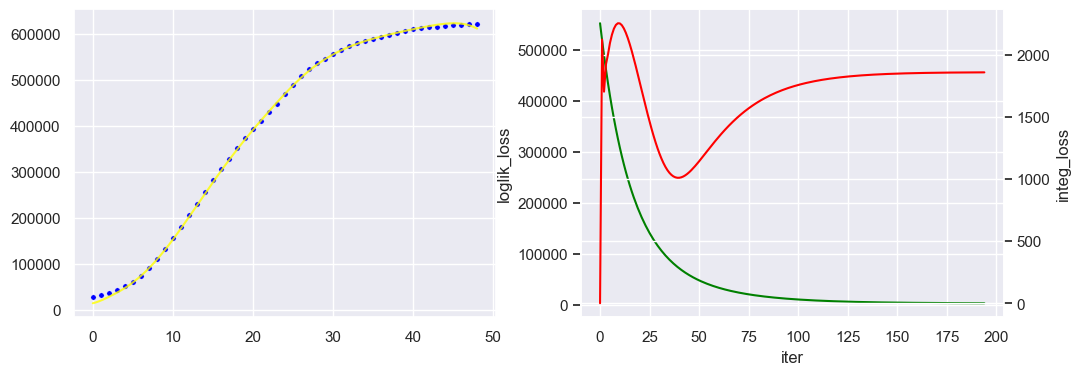

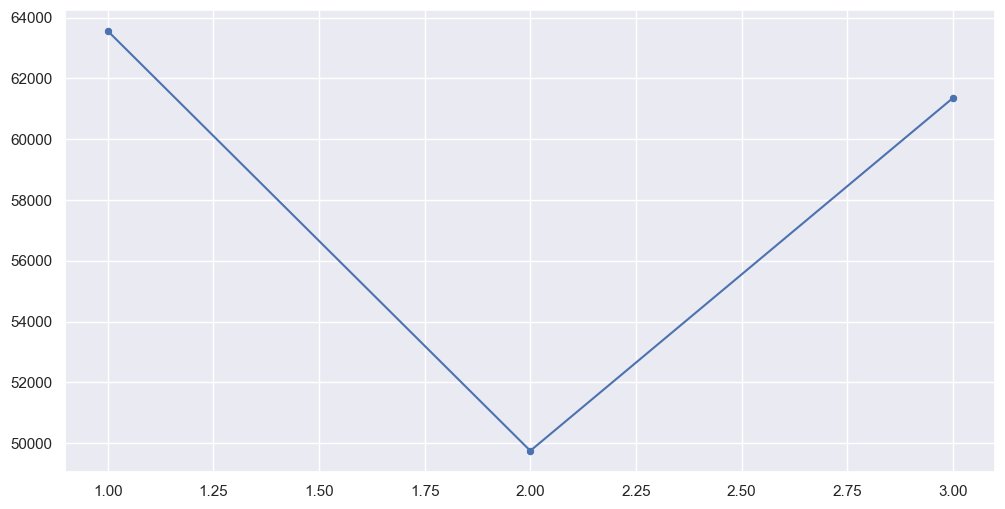

In [18]:
ser = data_sh.total_affected.iloc[28:].values

theta_opt, losses, fitted_opt, bs_funcs = model_theta_global_opt(
    ser,
    kappa_init=kappa_init,
    mu_init=mu_init,
    tau_init=tau_init,
    bs_interp_prop=0.5,
    interg_interp_prop=500.0,
    labd=5.0,
    bs_lr_schedule=(int(4e2), 0.02, 0.999),
    theta_lr_schedule=(int(2e2), 0.1, 0.99),
    early_stop_ratio=[1.5, 0.999],
    early_stop_steps=3,
    show_process="both",
)

<AxesSubplot:>

<AxesSubplot:>

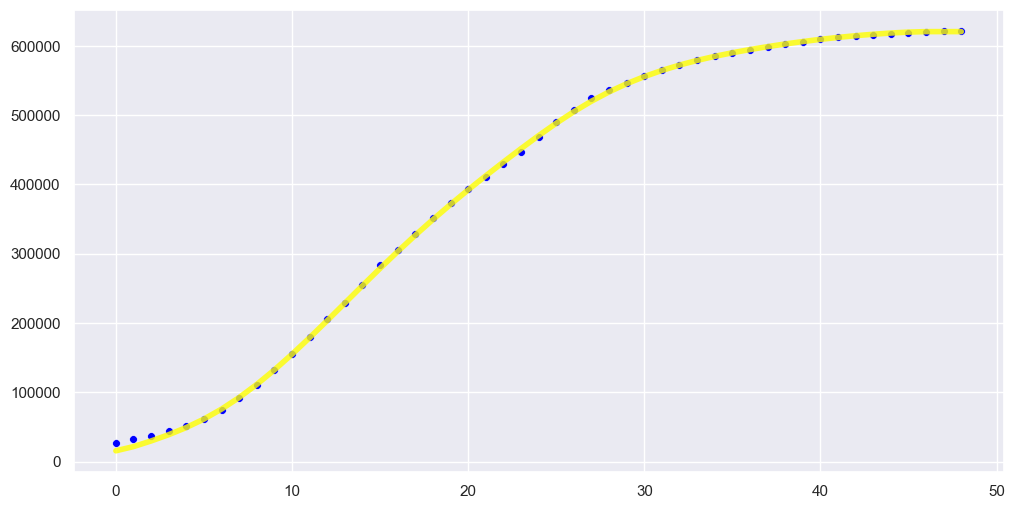

In [19]:
sns.scatterplot(x=range(len(ser)), y=ser, alpha=1.0, color="blue", s=32)
sns.lineplot(
    x=range(len(ser)), y=revise_ser(fitted_opt), alpha=0.8, color="yellow", linewidth=4
)

# Application on SZ

In [20]:
data_sz = pd.read_csv(
    "/Users/chenzhou/Documents/Everything/python/COVID19/data/covid19_shenzhen.csv",
    dtype={
        "week_group": int,
        "adt": int,
        "imputed_adt": float,
        "adt_prop": float,
        "store_cnt": int,
        "cfm_cases": pd.Int64Dtype(),
        "asym_cases": pd.Int64Dtype(),
        "covid_group": int,
    },
    parse_dates=["date"],
)
# data_sz.fillna(0, inplace=True)
data_sz["total_add"] = data_sz.cfm_cases + data_sz.asym_cases

In [204]:
data_modeling = data_sz.loc[
    # data_sz.week_group.isin(range(56, 78))
    # data_sz.week_group.isin(range(126, 130))
    data_sz.week_group.isin(range(162, 170))
]  # data_sz.covid_group.isin([2])
shifting = 0
data_modeling["total_affected"] = data_modeling.total_add.cumsum() + shifting

In [205]:
data_modeling

,date,week_group,adt,imputed_adt,adt_prop,store_cnt,cfm_cases,asym_cases,covid_group,total_add,total_affected
1133,2022-02-07,162,7823,7823.000,1.000,244,3,0,-1,3,3
1134,2022-02-08,162,7846,7846.000,1.000,244,2,1,-1,3,6
1135,2022-02-09,162,7998,7998.000,1.000,244,7,0,-1,7,13
1136,2022-02-10,162,8102,8102.000,1.000,246,1,0,-1,1,14
1137,2022-02-11,162,9233,9233.000,1.000,246,4,1,-1,5,19
1138,2022-02-12,162,9588,9588.000,1.000,242,11,2,-1,13,32
1139,2022-02-13,162,8949,8949.000,1.000,232,1,0,-1,1,33
1140,2022-02-14,163,10293,10293.000,1.000,246,1,0,-1,1,34
1141,2022-02-15,163,8603,8603.000,1.000,246,2,0,-1,2,36
1142,2022-02-16,163,8790,8790.000,1.000,246,3,0,-1,3,39


(array([-0.03830395, -0.24065218,  0.11340525]),
 4423.691220970062,
 array([  37.19561399,   27.91381743,   24.79630463,   25.41521918,
          28.03265506,   31.34628051,   35.10611038,   39.36305848,
          44.31928783,   50.25342897,   57.59873332,   66.76232811,
          77.89222291,   90.90296205,  105.03434653,  119.43783708,
         133.58627647,  147.08864653,  159.77710313,  171.58175918,
         182.60138174,  193.07001486,  203.59415647,  215.04293292,
         228.9635302 ,  247.02022591,  270.66760439,  300.84150689,
         336.61249561,  376.5916364 ,  419.41728867,  463.49316123,
         506.25706684,  545.13915933,  578.5048529 ,  605.26731686,
         625.59548064,  640.10540932,  649.94595022,  656.39634109,
         660.72459892,  664.50273351,  670.52994652,  683.09293414,
         711.20117872,  769.8028106 ,  892.87776595, 1127.38865742,
        1553.19699789]),
 (array([  37.19561399,   28.37513414,   22.4203448 ,   27.74391978,
           34.7999064

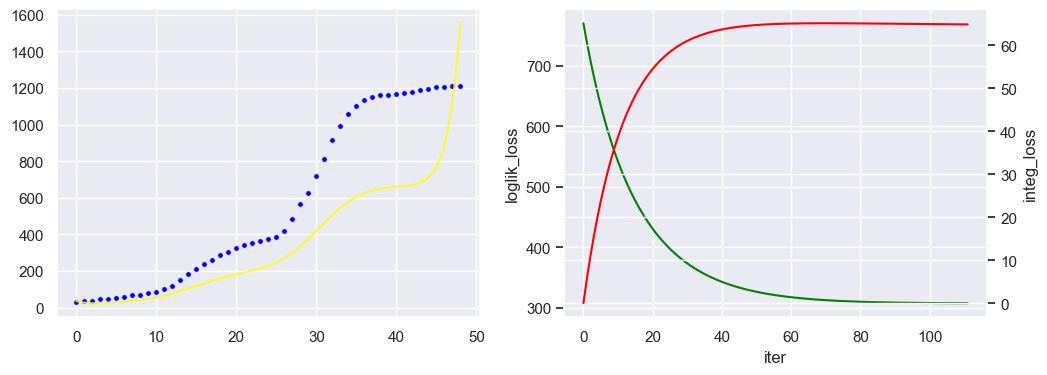

In [206]:
ser = np.concatenate([[0] * 0, data_modeling.total_affected.iloc[7:].values])
kappa_init, mu_init, tau_init = 0.72, 0.76, 1.43

bs_coeff_local_opt(
    ser,
    kappa=kappa_init,
    mu=mu_init,
    tau=tau_init,
    bs_interp_prop=0.5,
    interg_interp_prop=200.0,
    labd=5.0,
    lr=0.02,
    decay=0.999,
    iters=int(4e2),
    early_stop_ratio=[1.2, 0.9999],
    early_stop_steps=3,
    show_process=True,
    ser_loss_expansion=0.1,
)

In [209]:
theta_opt

array([0.61065746, 1.02502465, 1.57269699])

inter 0: Theta: [0.59987266 1.02007546 1.64016079] Loss: 454.5698712102446
inter 1: Theta: [0.59975872 1.02014259 1.64030553] Loss: 455.9436084307978
inter 2: Theta: [0.59965669 1.02020239 1.64043582] Loss: 457.16747376622675
inter 3: Theta: [0.59956529 1.02025572 1.64055309] Loss: 458.25893773767245
inter 4: Theta: [0.59948337 1.02030331 1.64065865] Loss: 459.23322173604237
inter 5: Theta: [0.59940992 1.02034583 1.64075366] Loss: 460.10362679800926
inter 6: Theta: [0.59934403 1.02038384 1.64083918] Loss: 460.88180738267613
inter 7: Theta: [0.5992849  1.02041785 1.64091615] Loss: 461.5780005306326
inter 8: Theta: [0.59923184 1.02044828 1.64098543] Loss: 462.20121862688967
inter 9: Theta: [0.59918419 1.02047555 1.64104779] Loss: 462.75941231430215
inter 10: Theta: [0.59914166 1.02049941 1.64110413] Loss: 463.4348017366338
inter 11: Theta: [0.59910345 1.0205208  1.64115484] Loss: 463.8734176405495
inter 12: Theta: [0.59906912 1.02053999 1.64120048] Loss: 464.26678723761916
inter 13: Thet

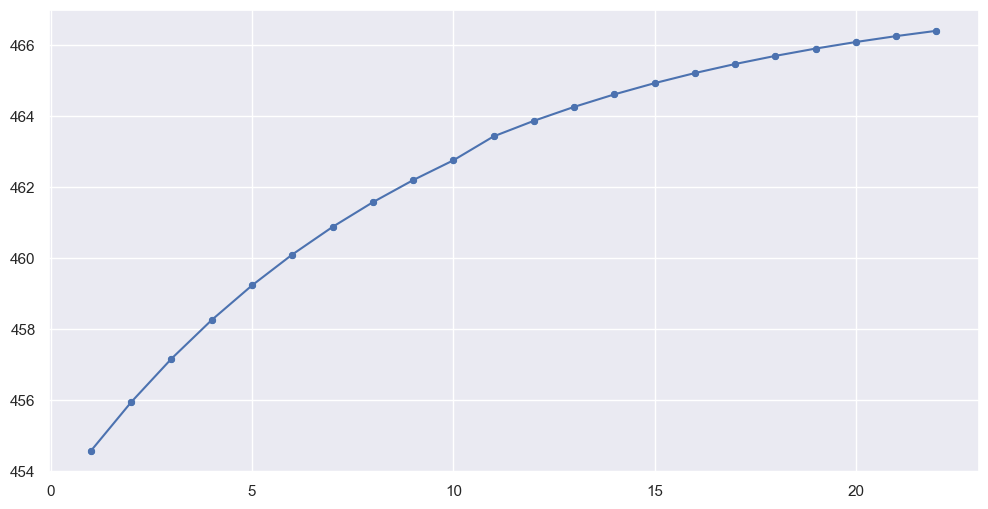

In [221]:
# 2020 56 + 4w 0.5794437  1.0217819  1.60897016
# 2021 127 + 3w 0.60308749, 1.02070991, 1.72955825
# 2022 163 + 7w 0.61065746, 1.02502465, 1.57269699

kappa_init, mu_init, tau_init = 0.60, 1.02, 1.64

theta_opt, losses, fitted_opt, bs_funcs = model_theta_global_opt(
    ser,
    kappa_init=kappa_init,
    mu_init=mu_init,
    tau_init=tau_init,
    bs_interp_prop=0.5,
    interg_interp_prop=200.0,
    labd=5.0,
    bs_lr_schedule=(int(4e2), 0.02, 0.999),
    theta_lr_schedule=(int(5e2), 0.01, 0.9),
    early_stop_ratio=[2.0, 0.999],
    early_stop_steps=20,
    show_process="outer",
    ser_loss_expansion=0.5,
)

<AxesSubplot:>

<AxesSubplot:>

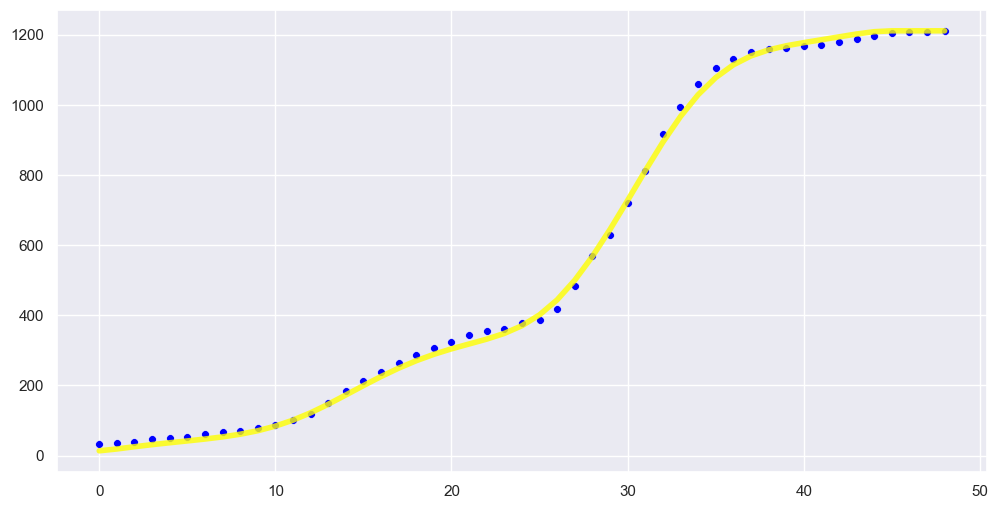

In [222]:
sns.scatterplot(x=range(len(ser)), y=ser, alpha=1.0, color="blue", s=32)
sns.lineplot(
    x=range(len(ser)), y=revise_ser(fitted_opt), alpha=0.8, color="yellow", linewidth=4
)

## Prediction

In [185]:
def next_pred(ser_for_now, pred_interp, theta):
    kappa, mu, tau = theta
    delta_t = 1 / pred_interp
    tau_shift_floor = int(tau * pred_interp)
    tau_shift_float = tau * pred_interp - tau_shift_floor
    ser_tau = (
        tau_shift_float * ser_for_now[-(tau_shift_floor + 2)]
        + (1 - tau_shift_float) * ser_for_now[-(tau_shift_floor + 1)]
    )
    return ser_for_now[-2] + np.clip(
        2 * delta_t * kappa * (ser_for_now[-1] - mu * ser_tau), 0, np.inf
    )


def pred_ser(ser, pred_length, pred_interp, pred_prev_len, theta):
    pred_prepare = np.array([ser[-1]])
    for _i in range(pred_prev_len):
        pred_prepare_append = np.linspace(
            ser[-2 - _i], ser[-1 - _i], pred_interp, endpoint=False
        )
        pred_prepare = np.concatenate([pred_prepare_append, pred_prepare])
    for _i in range(pred_length * pred_interp):
        next_tic = next_pred(pred_prepare, pred_interp, theta)
        pred_prepare = np.append(pred_prepare, next_tic)
    return pred_prepare

In [187]:
pred_len = 30
pred_interp = 10
pred_prev_len = 2
fitted_ser = revise_ser(fitted_opt)
pred_ser_combo = pred_ser(fitted_ser, pred_len, pred_interp, pred_prev_len, theta_opt)
pred_series = pred_ser_combo[pred_interp * pred_prev_len :][::pred_interp]
pred_series = revise_ser(pred_series, intercept=pred_series[0])

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

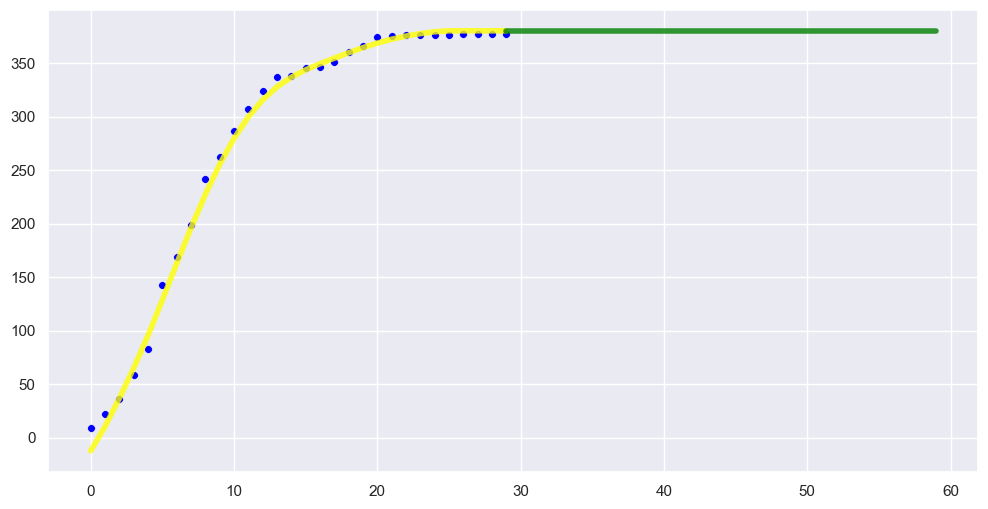

In [189]:
sns.scatterplot(x=range(len(fitted_ser)), y=ser, alpha=1.0, color="blue", s=32)
sns.lineplot(
    x=range(len(fitted_ser)), y=fitted_ser, alpha=0.8, color="yellow", linewidth=4
)
sns.lineplot(
    x=range(len(fitted_ser) - 1, len(fitted_ser) + pred_len),
    y=pred_series,
    alpha=0.8,
    color="green",
    linewidth=4,
)

In [190]:
def growth_decision(fitted_ser, pred_series, theta_opt):
    return (theta_opt.prod() - 1) * (
        pred_series[1] - pred_series[0] + fitted_ser[-1] - fitted_ser[-2]
    ) / 2 >= theta_opt[0] * (theta_opt[1] - 1) * fitted_ser[-1]

In [191]:
growth_decision(fitted_ser, pred_series, theta_opt)

False

## Integration

In [ ]:
def covid19_seer(cumulative_affected, seer_type):